In [1]:
# Math and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Preprocesssing Libraries
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [4]:
# Analysis libraries
from sklearn.metrics import silhouette_score, classification_report, accuracy_score, confusion_matrix

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

# Dataset

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
# Extracting datetime features
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['year'] = data['InvoiceDate'].dt.year
data['month'] = data['InvoiceDate'].dt.month
data['day'] = data['InvoiceDate'].dt.day
data['time'] = data['InvoiceDate'].dt.time
data['week_day'] = data['InvoiceDate'].dt.day_name()
data['hour'] = data['InvoiceDate'].dt.hour


data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,time,week_day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,08:26:00,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,08:26:00,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,Wednesday,8


In [9]:
# Initiating a revenue column
data['revenue'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,time,week_day,hour,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,08:26:00,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,08:26:00,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,Wednesday,8,20.34


In [10]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,year,month,day,hour,revenue
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,2010.921609,7.553128,15.023096,13.078729,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,2010.000000,1.000000,1.000000,6.000000,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,2011.000000,5.000000,7.000000,11.000000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,2011.000000,8.000000,15.000000,13.000000,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,2011.000000,11.000000,22.000000,15.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2011.000000,12.000000,31.000000,20.000000,168469.600000
std,218.081158,NaN,96.759853,1713.600303,0.268787,3.509055,8.664063,2.443270,378.810824


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   year         541909 non-null  int32         
 9   month        541909 non-null  int32         
 10  day          541909 non-null  int32         
 11  time         541909 non-null  object        
 12  week_day     541909 non-null  object        
 13  hour         541909 non-null  int32         
 14  revenue      541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), 

In [12]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
year                0
month               0
day                 0
time                0
week_day            0
hour                0
revenue             0
dtype: int64

In [13]:
data.shape

(541909, 15)

# Data Cleaning

In [14]:
# Dropping duplicate transactions
print("Number of duplicated transactions:", len(data[data.duplicated()]))
data.drop_duplicates(inplace = True)

Number of duplicated transactions: 5268


In [15]:
# Dropping 0 value data
data[data['UnitPrice'] == 0].head()
print("Before:", data.shape)

data = data[data['UnitPrice'] != 0]
print("After:", data.shape)

Before: (536641, 15)
After: (534131, 15)


We see that these transactions were probably made as some correction, so they also should be deleted.

In [16]:
# Dropping transactions with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# EDA

In [17]:
# Number of unique values for each column
grouped_data = data[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'year', 'month']]

for column in grouped_data.columns:
    print(f"{column}: {grouped_data[column].nunique()}")

InvoiceNo: 22186
StockCode: 3684
Description: 3896
Quantity: 435
UnitPrice: 619
CustomerID: 4371
Country: 37
year: 2
month: 12


In [18]:
# Start/End dates
data['InvoiceDate'].min(), data.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [19]:
# Range of sales
data['revenue'].quantile([0, 0.25, 0.5, 0.75, 1])

0.00   -168469.60
0.25         4.25
0.50        11.70
0.75        19.80
1.00    168469.60
Name: revenue, dtype: float64

Most of the data (0.25 to 0.75) shows us that the general range of a sale is between 3.4 to 17.4

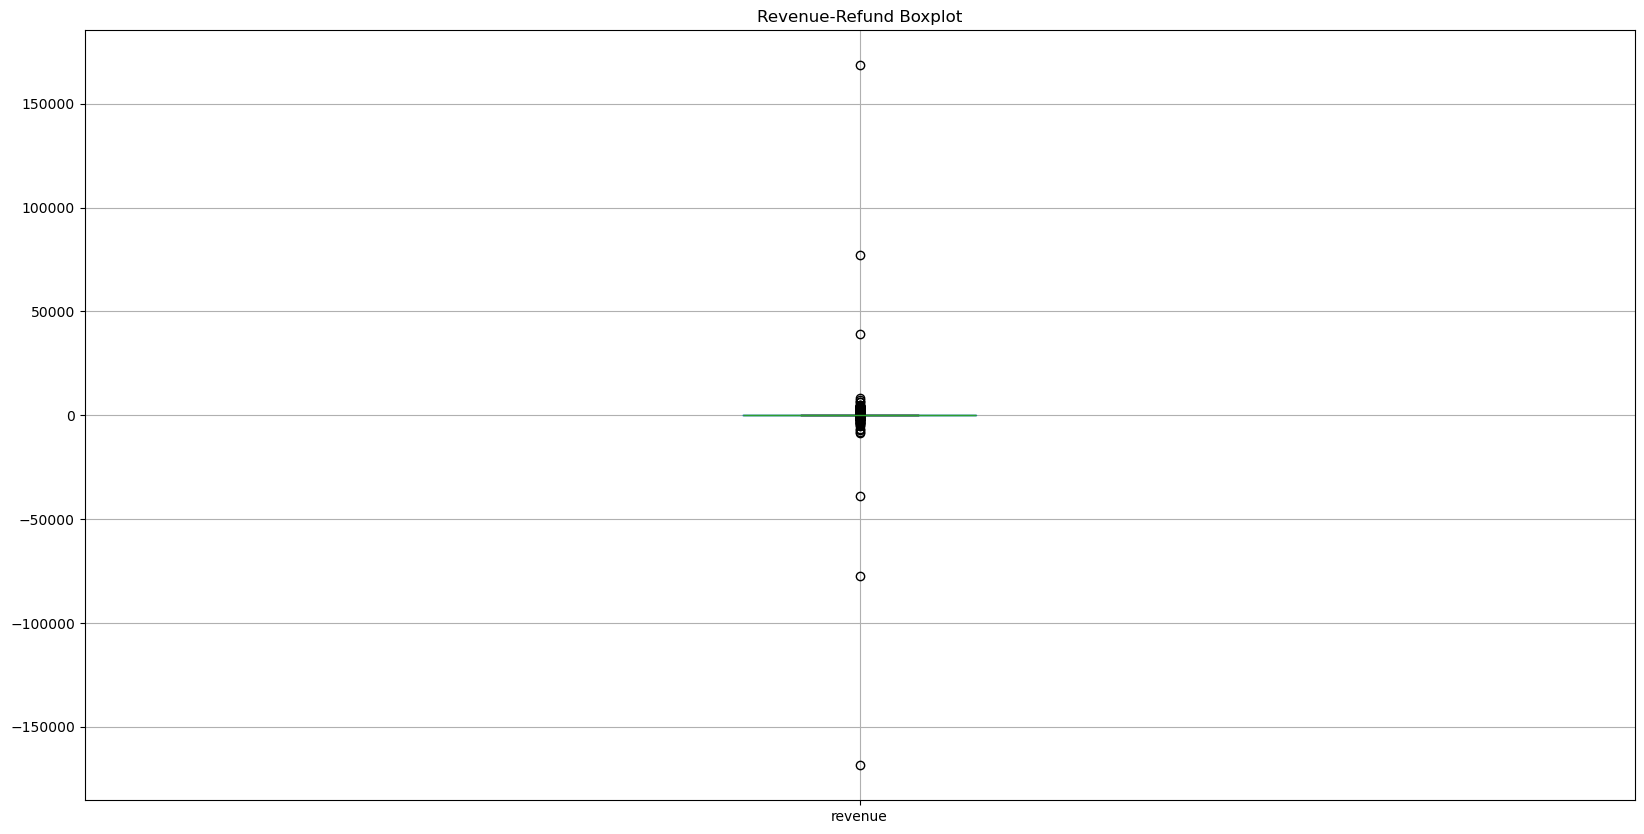

In [65]:
plt.figure(figsize=(20,10))
data.boxplot('revenue')
plt.title('Revenue-Refund Boxplot')
plt.show()

-ve values are refunds.

In [21]:
# Refunded sales
cancelled = data[data['InvoiceNo'].astype(str).str.contains('C')]
cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,time,week_day,hour,revenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,12,1,09:41:00,Wednesday,9,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,12,1,09:49:00,Wednesday,9,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,1,10:24:00,Wednesday,10,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1,10:24:00,Wednesday,10,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1,10:24:00,Wednesday,10,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,12,9,09:57:00,Friday,9,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,12,9,10:28:00,Friday,10,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,12,9,11:57:00,Friday,11,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,12,9,11:58:00,Friday,11,-1.25


In [22]:
print("Number of cancelled transactions:", len(cancelled))
print("Total number of transaction with negative quantity:", data[data['Quantity'] <= 0 ]['Quantity'].count())

Number of cancelled transactions: 8872
Total number of transaction with negative quantity: 8872


<Figure size 2000x1000 with 0 Axes>

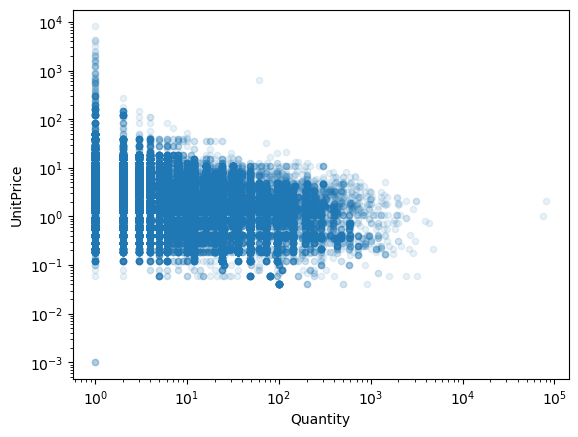

In [23]:
plt.figure(figsize=(20,10))

data[(data['UnitPrice'] < 10000) & (data['UnitPrice'] > 0) & (data['Quantity'] > 0)].plot(
    x='Quantity', y='UnitPrice',
    kind='scatter', loglog=True, alpha=0.1
)
plt.show()

In [24]:
# Aggregate daily sales
daily_sales = data.groupby('InvoiceDate')['revenue'].sum()
daily_sales

InvoiceDate
2010-12-01 08:26:00    139.12
2010-12-01 08:28:00     22.20
2010-12-01 08:34:00    348.78
2010-12-01 08:35:00     17.85
2010-12-01 08:45:00    855.86
                        ...  
2011-12-09 12:23:00    124.60
2011-12-09 12:25:00    140.64
2011-12-09 12:31:00    329.05
2011-12-09 12:49:00    339.20
2011-12-09 12:50:00    249.45
Name: revenue, Length: 20456, dtype: float64

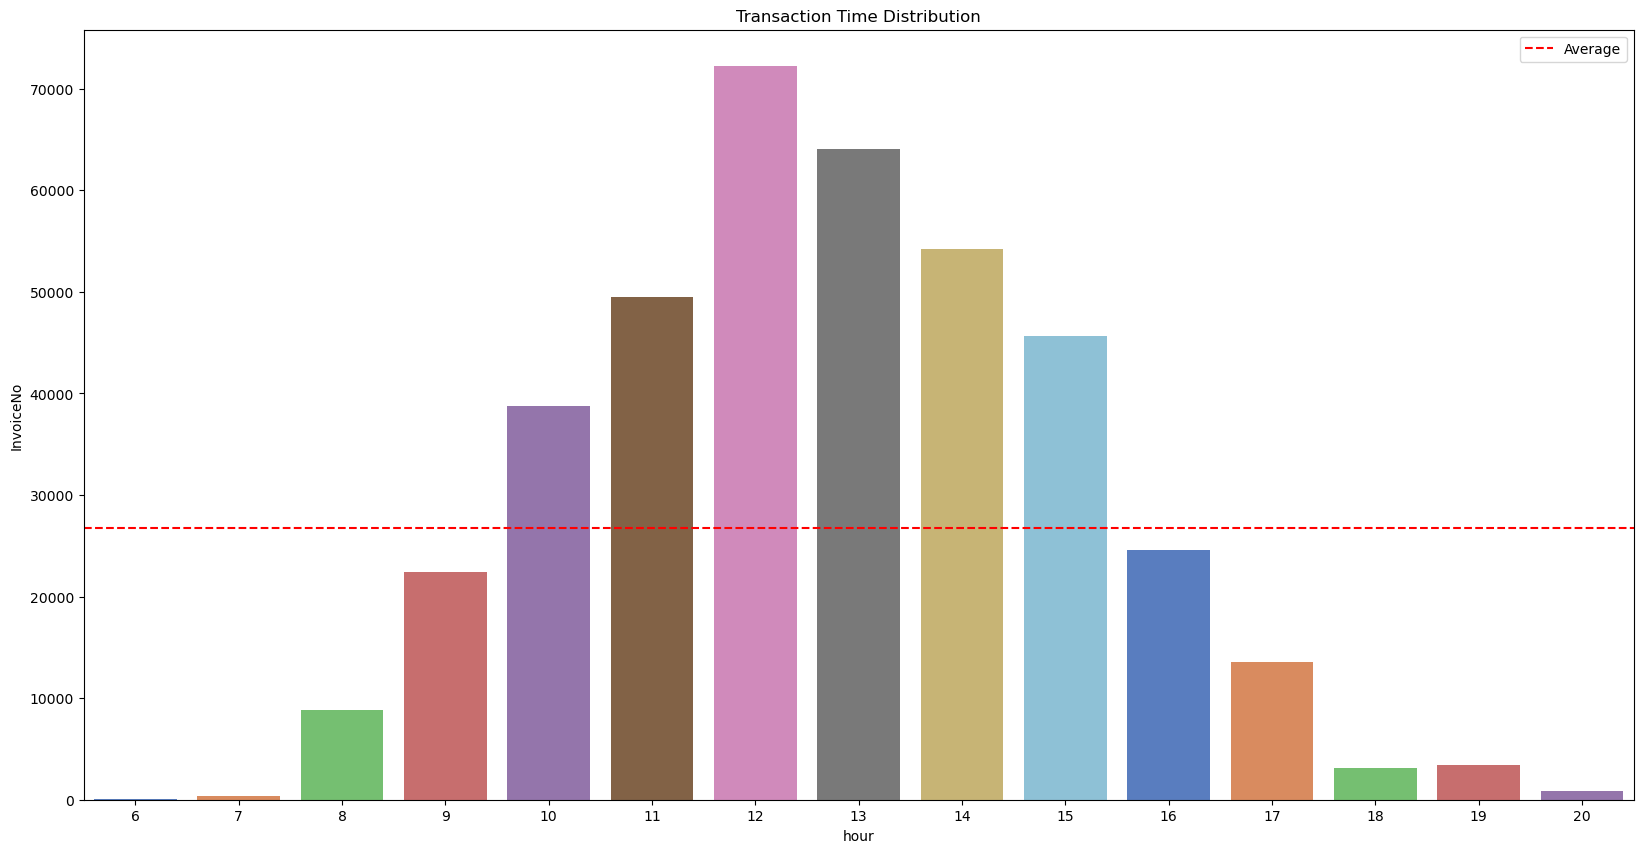

In [25]:
# Hourly sales

grouped_data = pd.DataFrame(data.groupby(['hour'])['InvoiceNo'].count()).reset_index()

avg_sales = grouped_data['InvoiceNo'].mean()   # Average sales

plt.figure(figsize=(20,10))
sns.barplot(x="hour", y="InvoiceNo", data = grouped_data, palette="muted")
plt.axhline(y=avg_sales, color='r', linestyle='--', label='Average')
plt.title('Transaction Time Distribution')
plt.legend()
plt.show()

Most sales occur during Mid-day

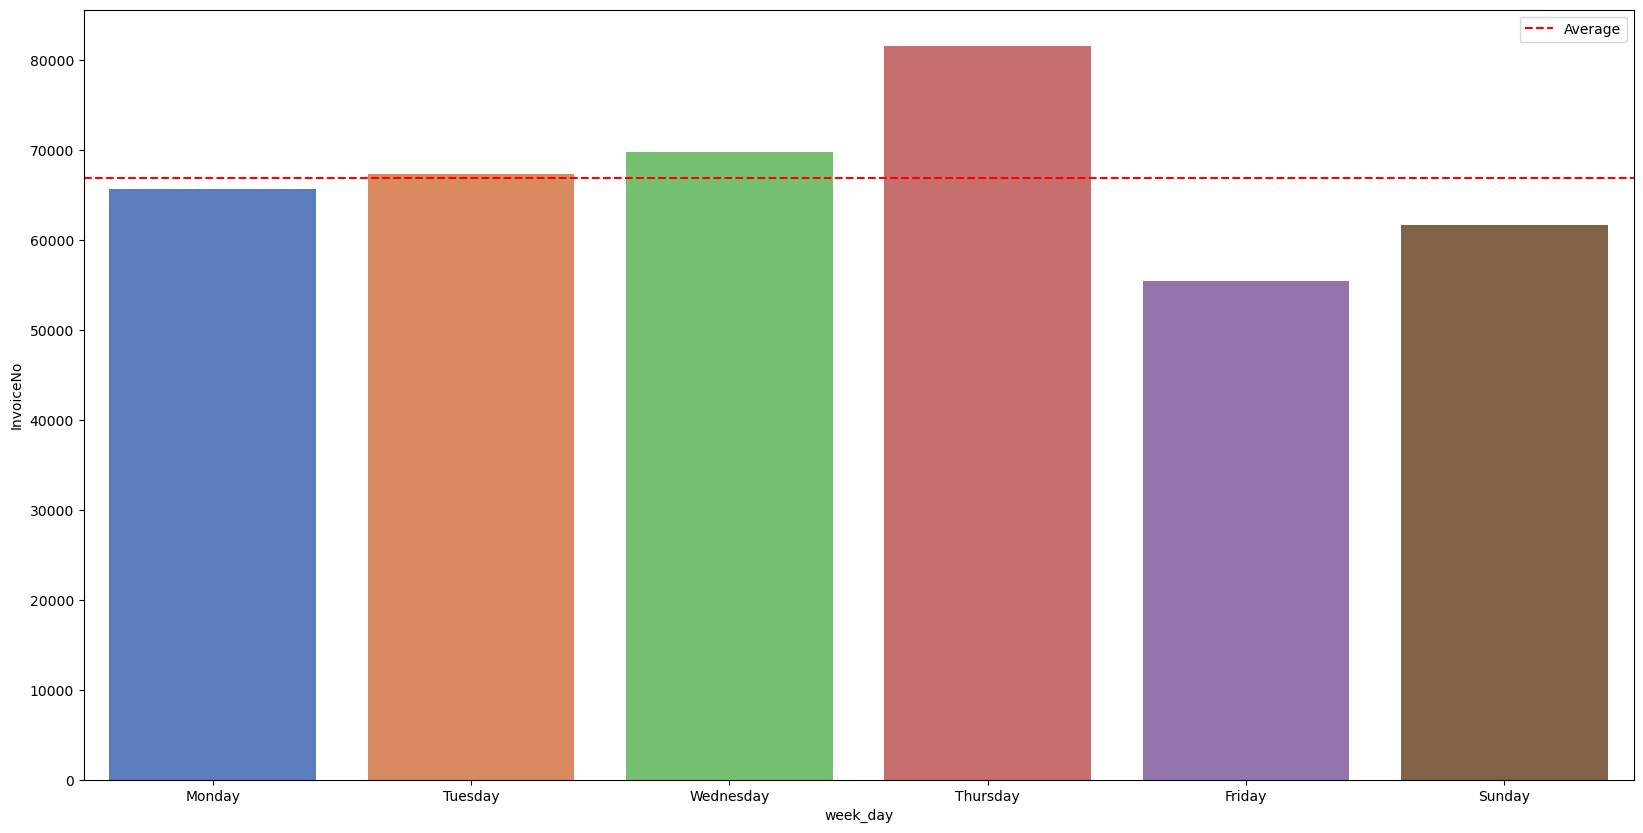

In [26]:
# Daily sales
grouped_data = pd.DataFrame(data.groupby(['week_day'])['InvoiceNo'].count())
grouped_data = grouped_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

avg_sales = grouped_data['InvoiceNo'].mean()   # Average sales

plt.figure(figsize=(20,10))
sns.barplot(x="week_day", y="InvoiceNo", data=grouped_data, palette="muted")
plt.axhline(y=avg_sales, color='r', linestyle='--', label='Average')
plt.legend()
plt.show()

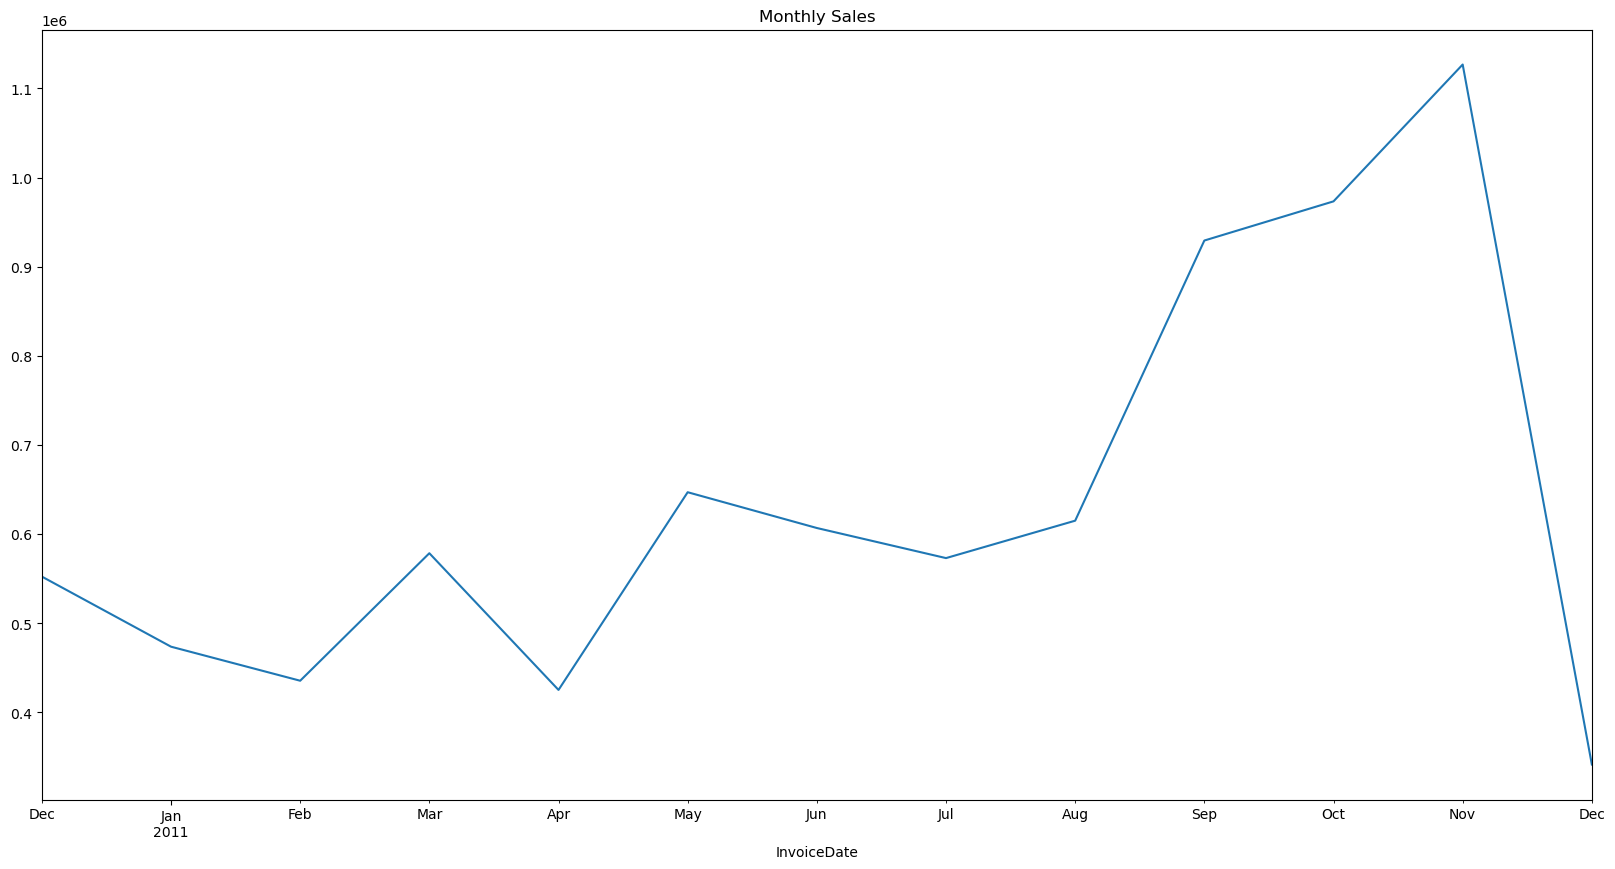

In [27]:
# Monthly sales
plt.figure(figsize=(20,10))
daily_sales.resample('ME').sum().plot(title = 'Monthly Sales')
plt.show()

In [28]:
# Aggregate country stats
country_sales = data.groupby('Country')['revenue'].agg([
    'std', 'sum', 'mean', 'median', 'count'
]).reset_index()

# Sort by total
country_sales = country_sales.sort_values('sum', ascending=False)
country_sales

,Country,std,sum,mean,median,count
35,United Kingdom,455.172315,6747156.154,18.915280,10.20,356704
23,Netherlands,164.347067,284661.540,120.262586,91.80,2367
10,EIRE,91.505145,250001.780,33.454005,17.34,7473
14,Germany,37.351409,221509.470,23.370908,16.60,9478
13,France,117.741188,196626.050,23.203452,16.50,8474
0,Australia,159.170749,137009.770,109.171131,51.84,1255
32,Switzerland,36.503684,55739.400,29.711834,17.70,1876
30,Spain,84.025973,54756.030,21.668393,15.00,2527
3,Belgium,15.583858,40910.960,19.773301,16.60,2069
31,Sweden,132.578397,36585.410,79.360976,30.00,461


In [29]:
# Transactions per country
customer_country = data[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3949
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


In [30]:
print("Transactions were made in", len(data['Country'].unique().tolist()), "different countries")
print("Number of transactions where country is unspecified:", len(data[data['Country']=='Unspecified']))

Transactions were made in 37 different countries
Number of transactions where country is unspecified: 241


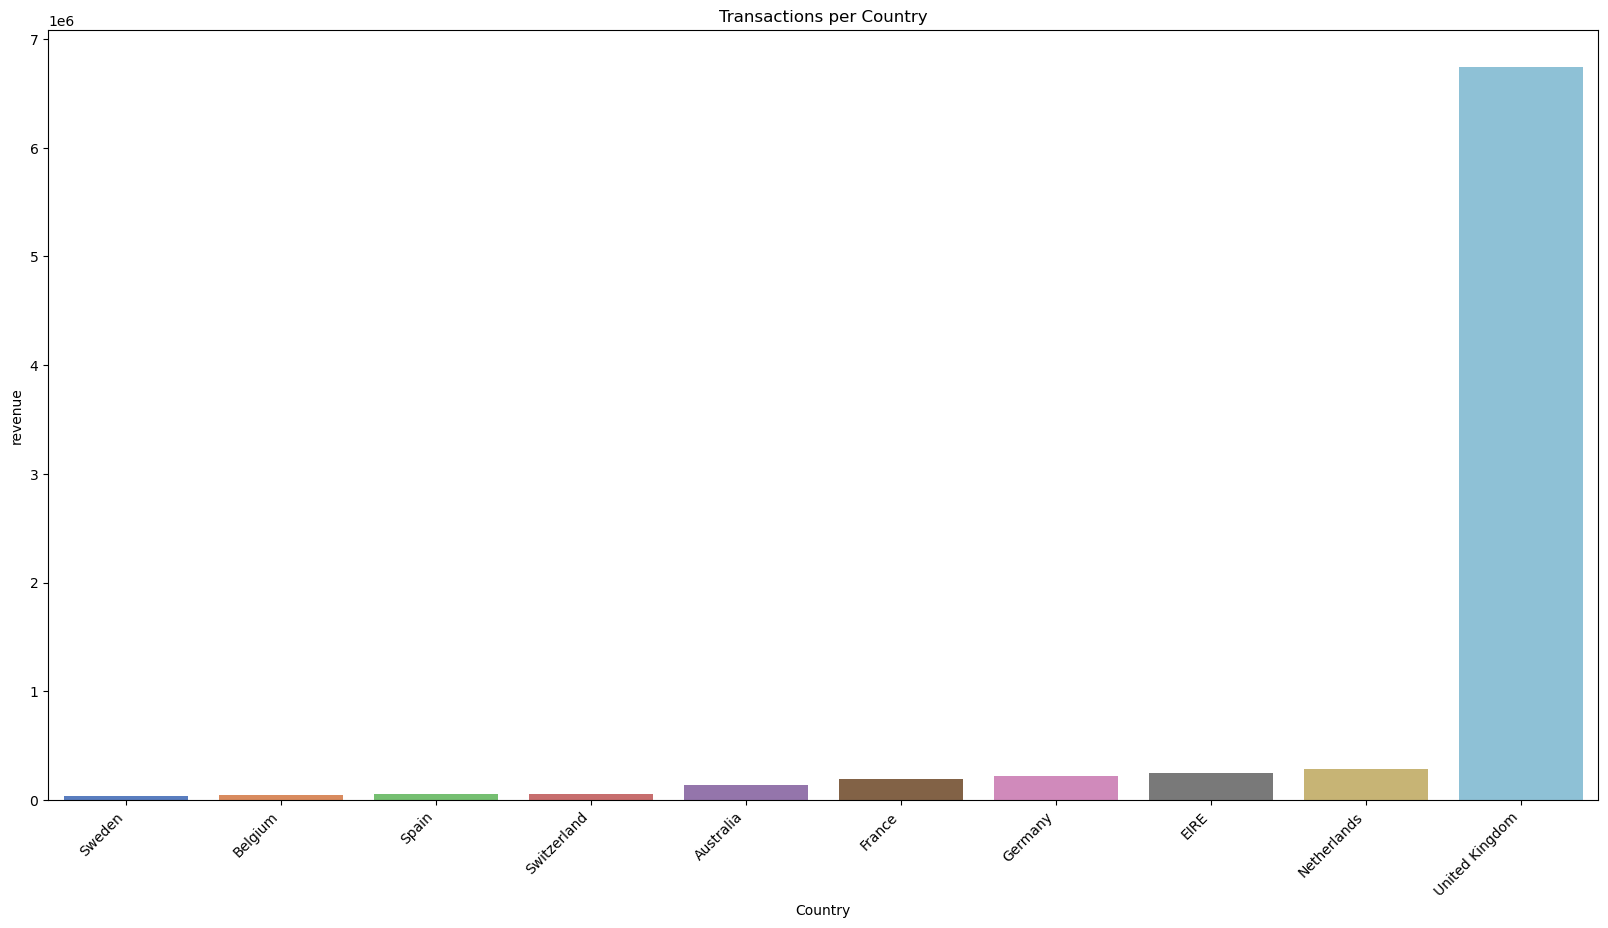

In [64]:
grouped_data = pd.DataFrame(data.groupby(['Country'])['revenue'].sum()).reset_index()
grouped_data = grouped_data.sort_values(['revenue']).reset_index(drop=True)

plt.figure(figsize=(20,10))
sns.barplot(x='Country', y='revenue', data=grouped_data.tail(10), estimator=max, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title('Transactions per Country')
plt.show()

The United Kingdom has by far the majority of the sales for this retail chain.

In [32]:
# Top customers
data['freq'] = data.groupby('CustomerID')['CustomerID'].transform('count')
customer  = pd.DataFrame(data.groupby(['CustomerID'])['revenue'].sum().sort_values(ascending=False)).reset_index().head(10)
top_customer = data[data['CustomerID'].isin(customer['CustomerID'].tolist())][['CustomerID', 'Country', 'revenue', 'Quantity', 'freq']]

top_customer['Country'].unique().tolist()

['United Kingdom', 'EIRE', 'Netherlands', 'Australia']

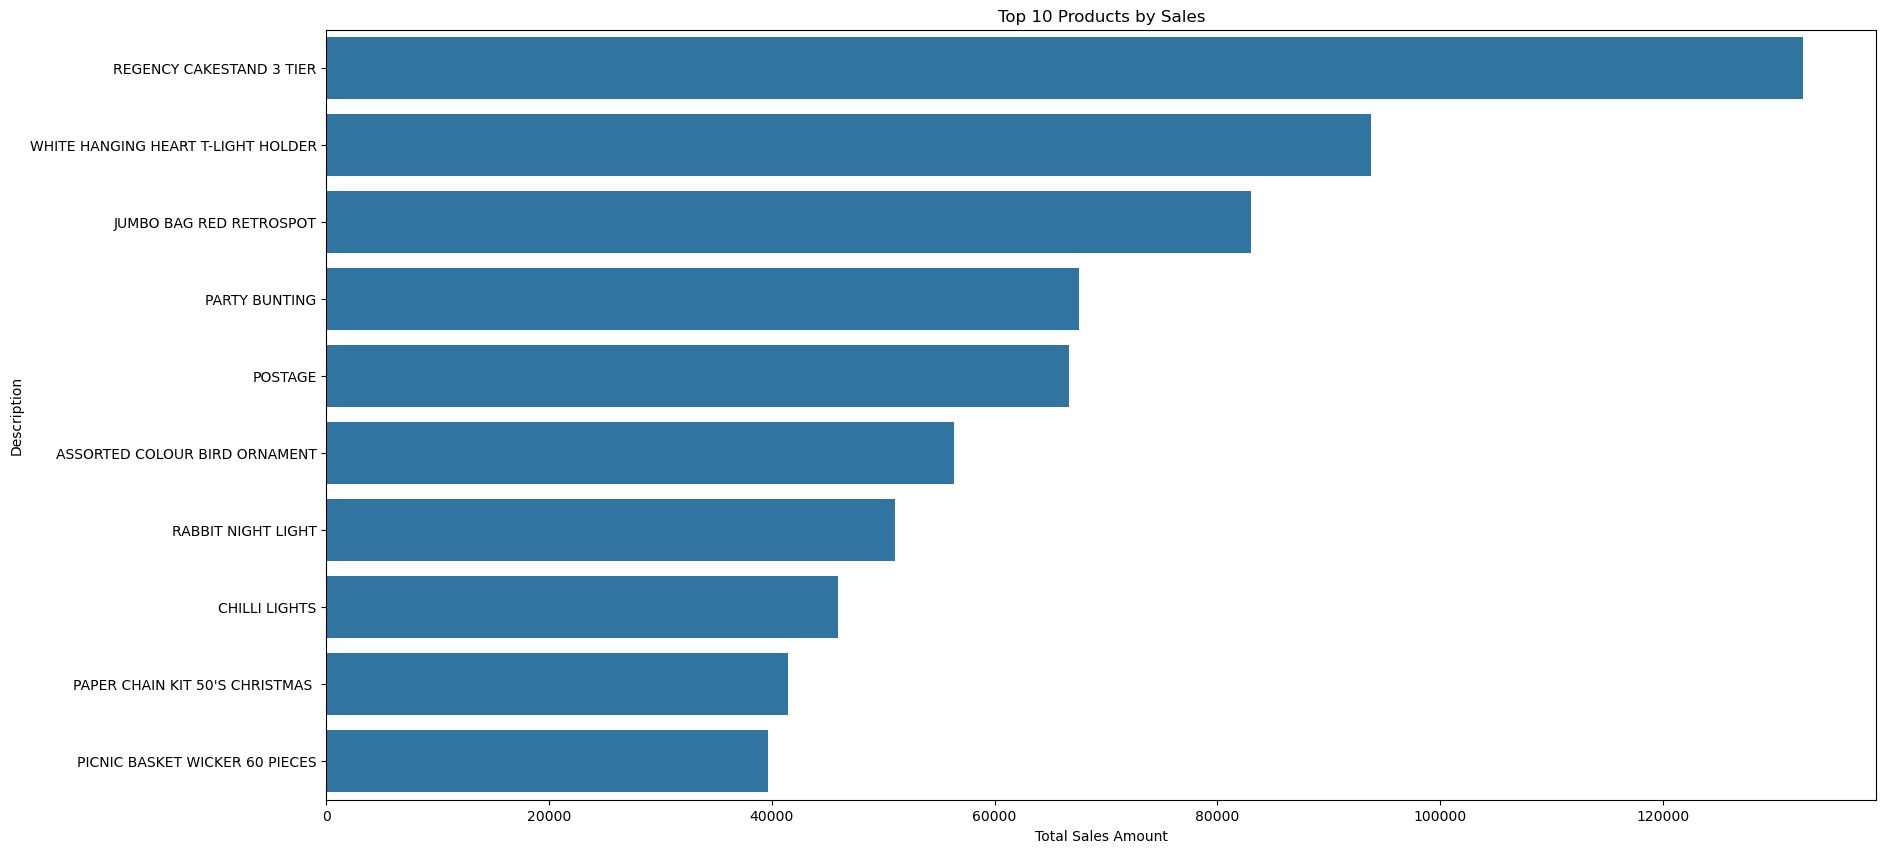

In [33]:
# Top products
top_products = data.groupby('Description')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(20, 10))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales Amount')
plt.show()

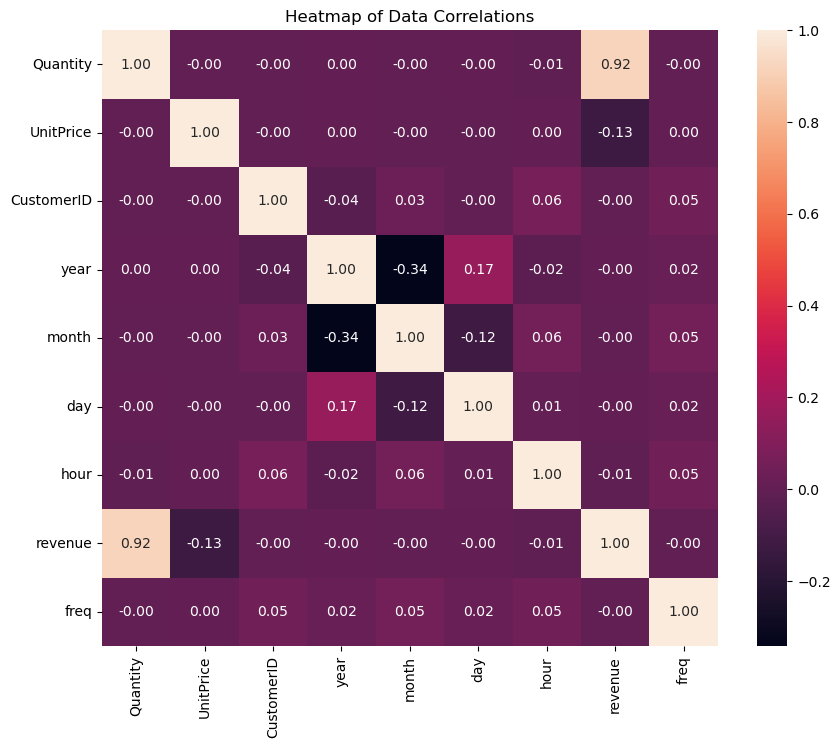

In [34]:
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Heatmap of Data Correlations')
plt.show()


# RFM Analysis

Recency - Frequency - Monetary_value

In [35]:
now = data['InvoiceDate'].max()
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'revenue': 'sum'  # Monetary
}).reset_index()

In [36]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [37]:
# RFM scores
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_quartiles = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_quartiles = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

rfm['R'] = r_quartiles
rfm['F'] = f_quartiles
rfm['M'] = m_quartiles

In [38]:
# RFM segment
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Customer segments
segment_dict = {
    '111': 'Lost Customers',   # Customers who haven't purchased recently, purchase infrequently, and spend little.
    '211': 'At Risk',   # Customers who are at risk of churning.
    '311': 'Need Attention',   # Customers who need engagement to increase their value.
    '411': 'Loyal Customers',   # Regular customers with good purchase history.
    '444': 'Champions'   # High-value customers who purchase frequently and recently.
}

rfm['Customer_Segment'] = rfm['RFM_Segment'].map(segment_dict)

In [39]:
rfm_table = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Segment', 'Customer_Segment']]
print(rfm_table.head(20))

    CustomerID  Recency  Frequency  Monetary RFM_Segment Customer_Segment
0      12346.0      325          2      0.00         111   Lost Customers
1      12347.0        1        182   4310.00         444        Champions
2      12348.0       74         31   1797.24         224              NaN
3      12349.0       18         73   1757.55         334              NaN
4      12350.0      309         17    334.40         112              NaN
5      12352.0       35         95   1545.41         333              NaN
6      12353.0      203          4     89.00         111   Lost Customers
7      12354.0      231         58   1079.40         133              NaN
8      12355.0      213         13    459.40         112              NaN
9      12356.0       22         59   2811.43         334              NaN
10     12357.0       32        131   6207.67         344              NaN
11     12358.0        1         19   1168.06         423              NaN
12     12359.0        7        251   6

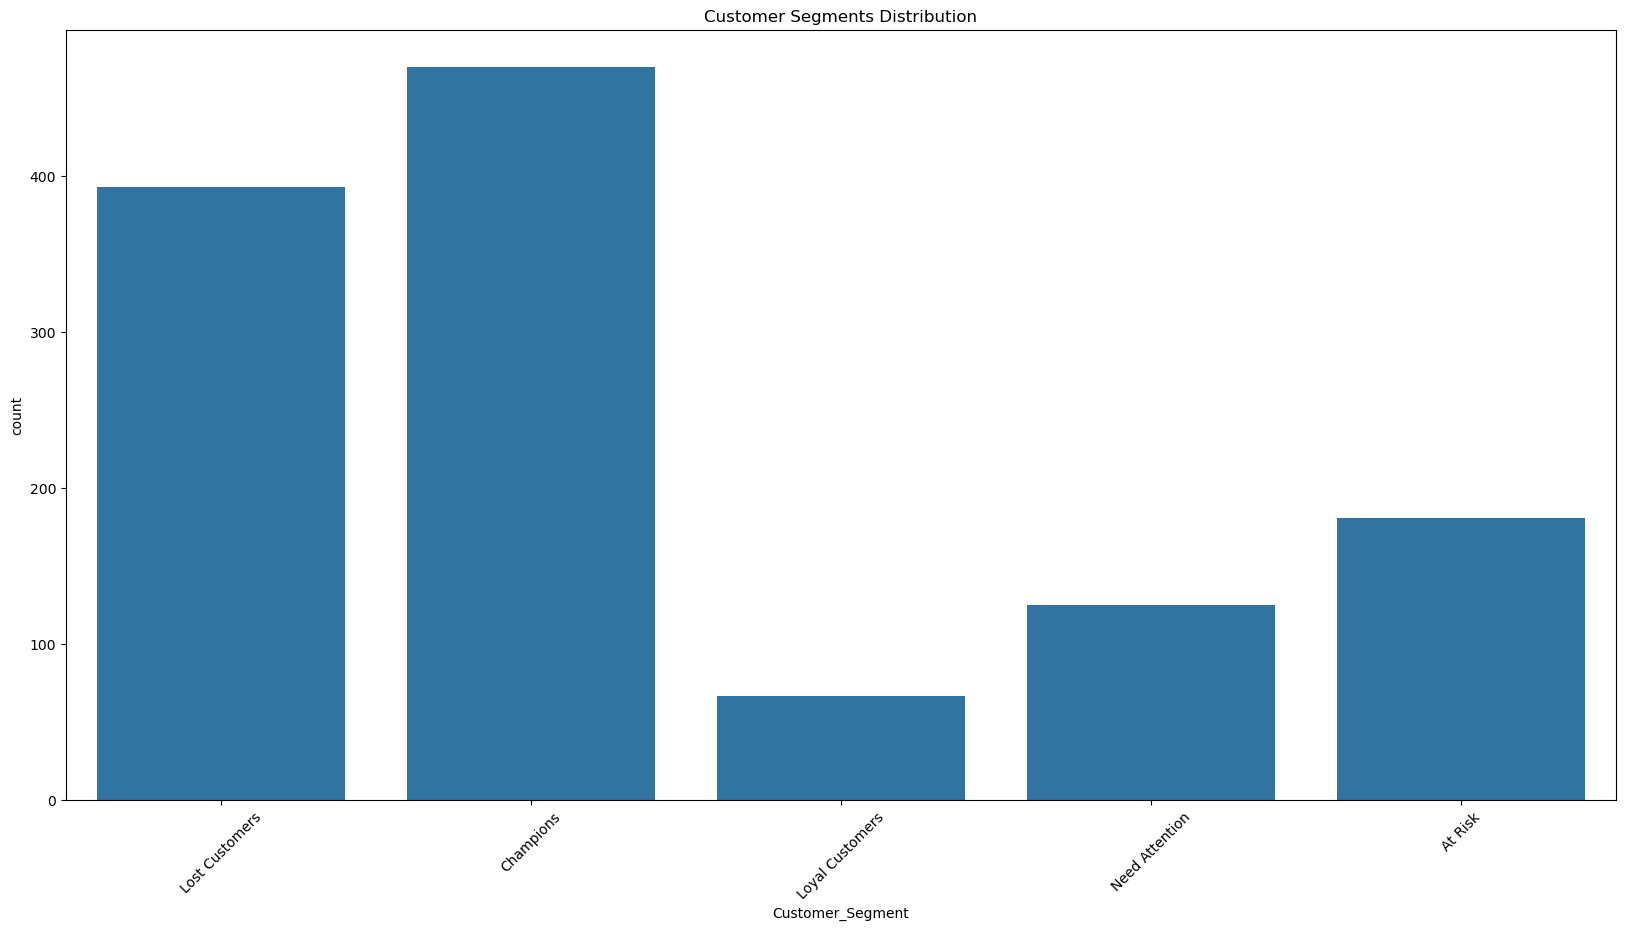

In [40]:
plt.figure(figsize=(20, 10))
sns.countplot(data=rfm, x='Customer_Segment')
plt.title('Customer Segments Distribution')
plt.xticks(rotation=45)
plt.show()

# Pre-processing

While RFM segmentation helps in understanding customer behavior and categorizing them into distinct groups, RFM analysis is relatively simple and may not capture complex relationships in the data. 

ML models, especially those that can handle non-linear relationships, can uncover deeper insights and patterns

In [41]:
# Removing Null values from the RMF evaluated data
rfm = rfm.dropna()

In [42]:
# Target and Features(using RFM segments as labels)
features = ['Recency', 'Frequency', 'Monetary']

X = rfm[features]
y = rfm['Customer_Segment']

In [43]:
# Scale the features - KMeans
le = LabelEncoder()
le.fit_transform(y)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [44]:
# Scale the features - Logistic
X_scaled = scaler.fit_transform(X)

In [45]:
# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KMeans

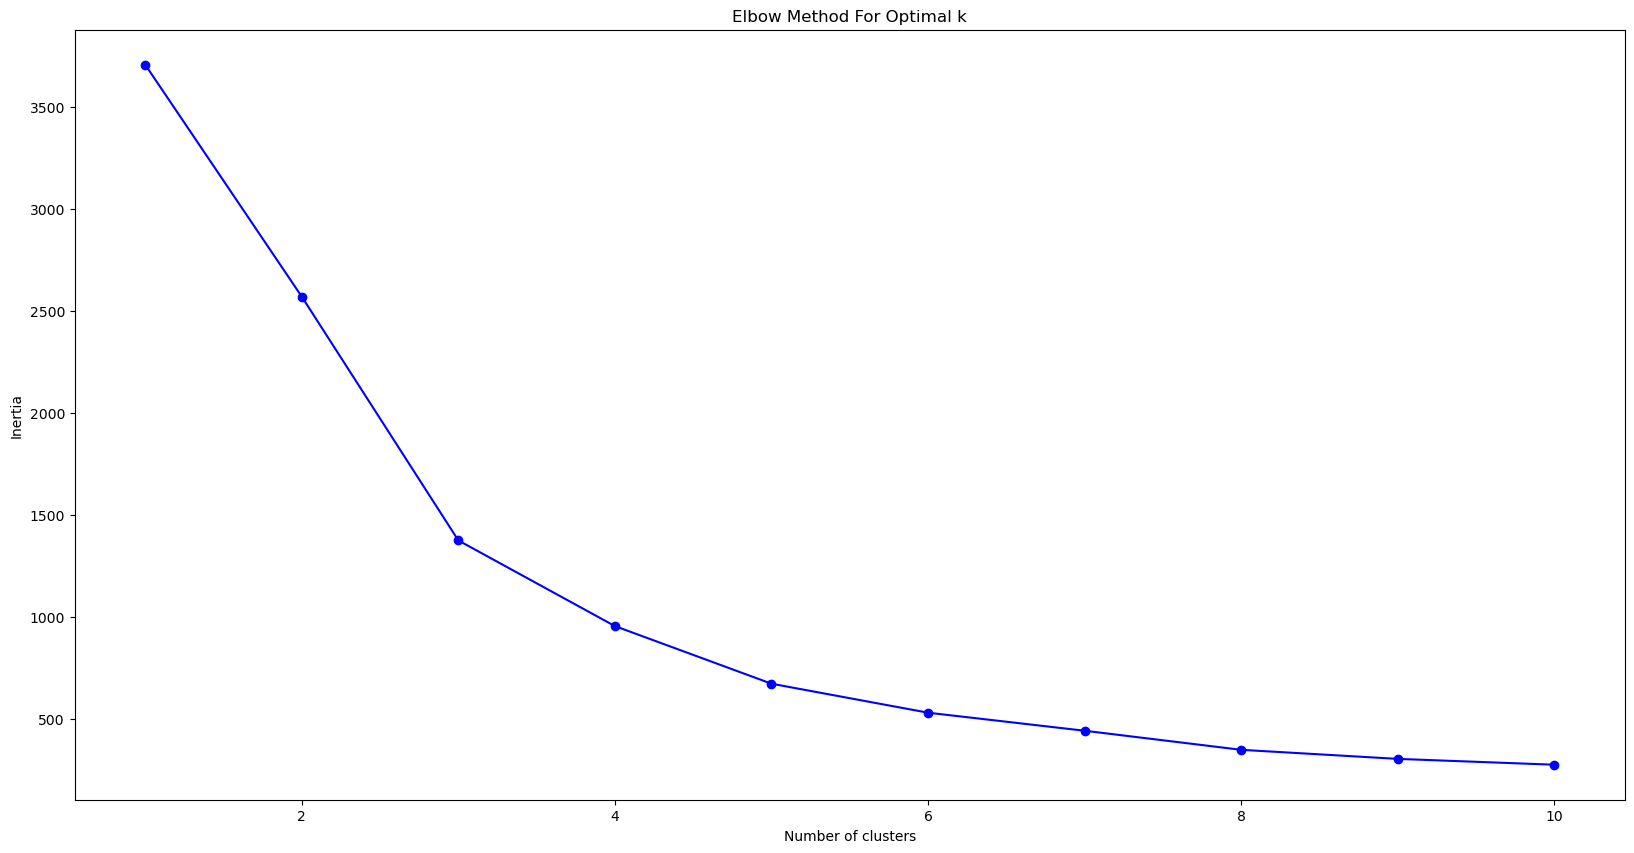

In [46]:
# Elbow method

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(20, 10))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [47]:
# Fitting into model 
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(rfm_scaled)

KMeans(n_clusters=5, random_state=42)

In [48]:
# Finding the centeroids
centroids = kmeans.cluster_centers_

In [49]:
# Predictions
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [50]:
# Silhouette score
silhouette_Km = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f"Silhouette Score: {silhouette_Km:.2f}")

Silhouette Score: 0.60


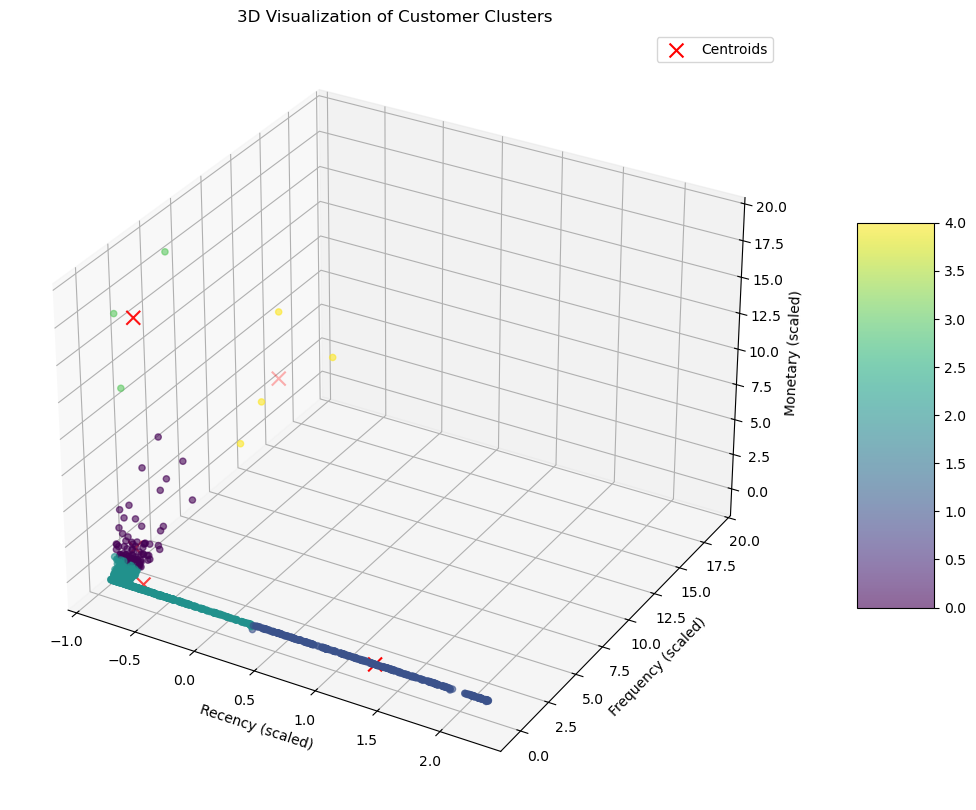

In [51]:
# 3D Plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(rfm_scaled[:, 0], rfm_scaled[:, 1], rfm_scaled[:, 2], c=rfm['Cluster'], cmap='viridis', marker='o', alpha=0.6)

# Centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=100, label='Centroids')

ax.set_title('3D Visualization of Customer Clusters')
ax.set_xlabel('Recency (scaled)')
ax.set_ylabel('Frequency (scaled)')
ax.set_zlabel('Monetary (scaled)')

plt.legend()
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
plt.show()

# Logistic Regression

In [52]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [53]:
# Predictions
y_pred_logreg = logreg.predict(X_test)

In [54]:
# Accuracy score
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy_logreg:.2f}")

Accuracy: 0.92


In [55]:
# Summary of Logistic Regression model
print(classification_report(y_test, y_pred_logreg))

                 precision    recall  f1-score   support

        At Risk       0.92      0.94      0.93        36
      Champions       1.00      1.00      1.00        86
 Lost Customers       0.98      1.00      0.99        83
Loyal Customers       1.00      0.06      0.12        16
 Need Attention       0.62      0.89      0.73        27

       accuracy                           0.92       248
      macro avg       0.90      0.78      0.75       248
   weighted avg       0.94      0.92      0.90       248



# Decision Tree

In [56]:
# Train decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
# Predictions
y_pred_dt = dt.predict(X_test)

In [58]:
# COnfusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
conf_matrix

array([[36,  0,  0,  0,  0],
       [ 0, 86,  0,  0,  0],
       [ 0,  0, 83,  0,  0],
       [ 0,  0,  0, 16,  0],
       [ 0,  0,  0,  0, 27]])

In [59]:
# Accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.2f}")

Accuracy: 1.00


In [60]:
# Summary of the Decision Tree Classifier Model
print(classification_report(y_test, y_pred_dt))

                 precision    recall  f1-score   support

        At Risk       1.00      1.00      1.00        36
      Champions       1.00      1.00      1.00        86
 Lost Customers       1.00      1.00      1.00        83
Loyal Customers       1.00      1.00      1.00        16
 Need Attention       1.00      1.00      1.00        27

       accuracy                           1.00       248
      macro avg       1.00      1.00      1.00       248
   weighted avg       1.00      1.00      1.00       248



# Analyzing the Models

In [61]:
# Insights into importance of RMF variables
importances = dt.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
     Feature  Importance
0    Recency    0.550789
1  Frequency    0.449211
2   Monetary    0.000000


In [62]:
# ML Model's summary
accuracy_silhouette = pd.DataFrame({
    'Model': ['KMeans (Silhouette)', 'Logistic Regression (Accuracy)', 'Decision Tree (Accuracy)'],
    'Scores': [silhouette_Km,
             accuracy_logreg, 
             accuracy_dt]
})
accuracy_silhouette

,Model,Scores
0,KMeans (Silhouette),0.597080
1,Logistic Regression (Accuracy),0.919355
2,Decision Tree (Accuracy),1.000000


In [63]:
# RFM analysis summary
rfm_summary = rfm[['RFM_Segment', 'Customer_Segment']].value_counts().reset_index(name='Count')

# Display the table
print(rfm_summary)

  RFM_Segment Customer_Segment  Count
0         444        Champions    470
1         111   Lost Customers    393
2         211          At Risk    181
3         311   Need Attention    125
4         411  Loyal Customers     67
